## Observations and Insights 

*Write at least three observations or inferences that can be made from the data*

1. There is a strong positive correlation between average tumor volume and mouse weight for the Capomulin regimen
2. Capomulin and Ramicane seem to be more effective than Infubinol and Ceftamin. The IQR for the final tumor volume under Capomulin and Ramicane falls below the mean and median tumor volume for those drug regimens overall. Contrastingly, The IQR for the final tumor volume under Infubinol and Ceftamin falls above the overall mean and median tumor volume for these drug regimens.
3. The above difference between Capomulin & Ramicane and Infubinol & Ceftamin could be related to the difference in total number of timepoints for all mice tested within those drug regimens; Infubinol and Ceftamin had fewer total timepoints than Capomulin and Ramicane.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"], indicator=True)

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
0,k403,Ramicane,Male,21,16,0,45.000000,0,both
1,k403,Ramicane,Male,21,16,5,38.825898,0,both
2,k403,Ramicane,Male,21,16,10,35.014271,1,both
3,k403,Ramicane,Male,21,16,15,34.223992,1,both
4,k403,Ramicane,Male,21,16,20,32.997729,1,both
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,both
1889,z969,Naftisol,Male,9,30,30,65.841013,3,both
1890,z969,Naftisol,Male,9,30,35,69.176246,4,both
1891,z969,Naftisol,Male,9,30,40,70.314904,4,both


In [3]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [4]:
#total rows - to compare with count after dropping duplicates
df["Mouse ID"].count()

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. - received help from LA
duplicate_mice = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicate_index = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].index
# duplicate_data = df.iloc[duplicate_index]
# duplicate_data

duplicate_mouse_df = df.loc[df["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
908,g989,Propriva,Female,21,26,0,45.000000,0,both
909,g989,Propriva,Female,21,26,0,45.000000,0,both
910,g989,Propriva,Female,21,26,5,48.786801,0,both
911,g989,Propriva,Female,21,26,5,47.570392,0,both
912,g989,Propriva,Female,21,26,10,51.745156,0,both
913,g989,Propriva,Female,21,26,10,49.880528,0,both
914,g989,Propriva,Female,21,26,15,51.325852,1,both
915,g989,Propriva,Female,21,26,15,53.442020,0,both
916,g989,Propriva,Female,21,26,20,55.326122,1,both
917,g989,Propriva,Female,21,26,20,54.657650,1,both


In [7]:
#needed to fix and drop all rows w/ g989, not just the duplicate rows
#clean_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
0,k403,Ramicane,Male,21,16,0,45.000000,0,both
1,k403,Ramicane,Male,21,16,5,38.825898,0,both
2,k403,Ramicane,Male,21,16,10,35.014271,1,both
3,k403,Ramicane,Male,21,16,15,34.223992,1,both
4,k403,Ramicane,Male,21,16,20,32.997729,1,both
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,both
1889,z969,Naftisol,Male,9,30,30,65.841013,3,both
1890,z969,Naftisol,Male,9,30,35,69.176246,4,both
1891,z969,Naftisol,Male,9,30,40,70.314904,4,both


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1880

In [9]:
# still have the same number of unique Mouse IDs - will be 248
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

grouped_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

grouped_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

grouped_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

grouped_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_statistics_df = pd.DataFrame({"Mean of Tumor Volume": grouped_mean, "Median of Tumor Volume":grouped_median, "Var of Tumor Volume":grouped_var, "Std Dev of Tumor Volume":grouped_std, "SEM of Tumor Volume":grouped_sem})
summary_statistics_df

,Mean of Tumor Volume,Median of Tumor Volume,Var of Tumor Volume,Std Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
sum_stats_agg = clean_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}) 
sum_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Timepoints for All Mice Tested for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints for All Mice Tested'>

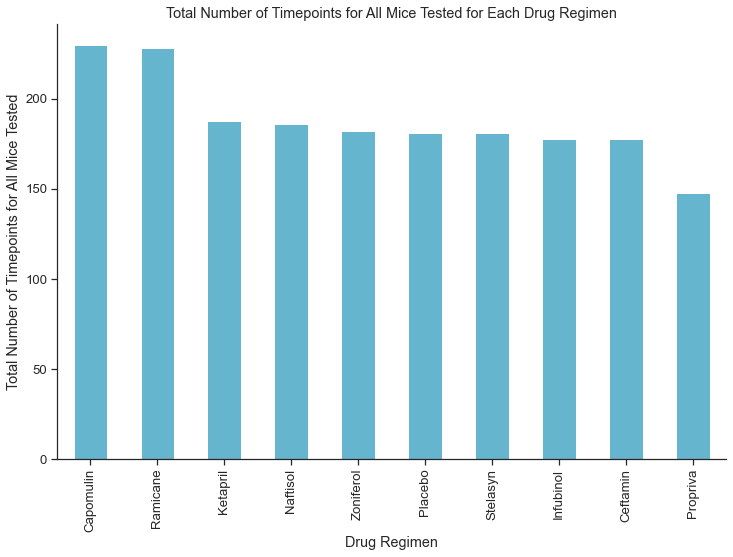

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# counting entries for each drug regimen
total_timepoints = clean_df["Drug Regimen"].value_counts()
#print(total_timepoints)

total_timepoints.plot.bar(title="Total Number of Timepoints for All Mice Tested for Each Drug Regimen",xlabel="Drug Regimen",ylabel="Total Number of Timepoints for All Mice Tested",  color='c')
#plt.xticks(rotation="45", ha="right")

Text(0, 0.5, 'Total Number of Timepoints for All Mice Tested')

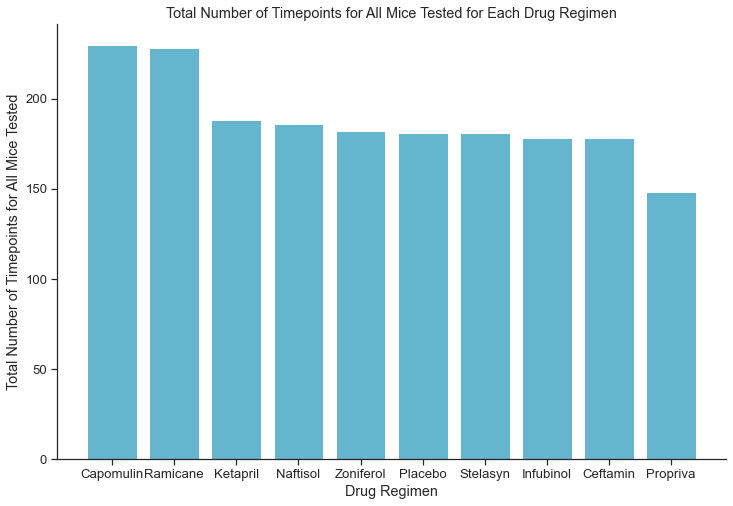

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# creating list of unique Drug Regimen names for x axis, using total_timepoints for y axis (created in cell above)
drug_regimen = total_timepoints.index

plt.bar(drug_regimen,total_timepoints, color='c')
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints for All Mice Tested")
#this one needs to be fixed

In [15]:
# counting number of mice labeled Male and Female
sex_distr = clean_df.Sex.value_counts()

<AxesSubplot:title={'center':'Distribution of Female Versus Male Mice'}, ylabel='Sex of Mice'>

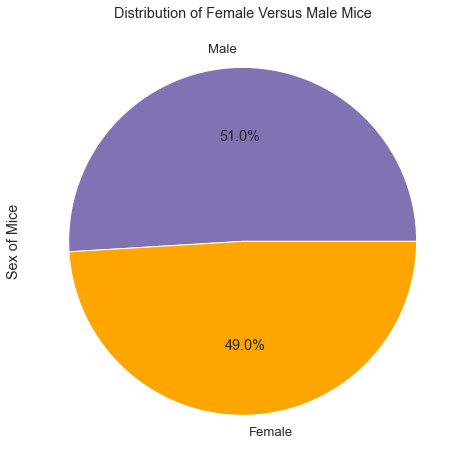

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["m","orange"]
sex_distr.plot.pie(labels=sex_distr.index, ylabel="Sex of Mice", autopct="%1.1f%%", title="Distribution of Female Versus Male Mice", colors=colors )

Text(0, 0.5, 'Sex of Mice')

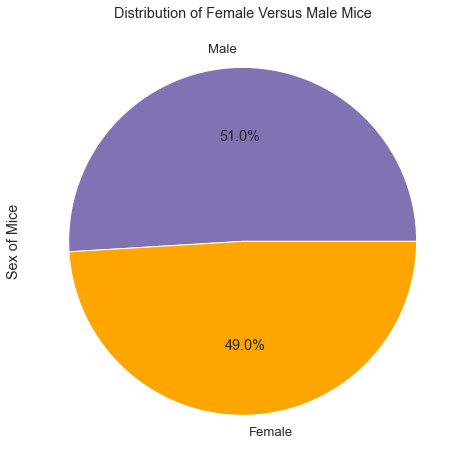

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_distr,labels=sex_distr.index, autopct="%1.1f%%", colors=colors)
plt.title("Distribution of Female Versus Male Mice")
plt.ylabel("Sex of Mice")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# apply groupby by mouse ID, then use agg max function on timepoint
fixed_df = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
fixed_df = fixed_df.reset_index()
fixed_df

/var/folders/q2/5v2xmgf12v118bg1jrms5ph80000gn/T/ipykernel_31503/2812172560.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  fixed_df = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = fixed_df.merge(clean_df, on=["Mouse ID","Timepoint"], how='left')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,_merge
0,a203,45,Infubinol,Female,20,23,67.973419,2,both
1,a251,45,Infubinol,Female,21,25,65.525743,1,both
2,a262,45,Placebo,Female,17,29,70.717621,4,both
3,a275,45,Ceftamin,Female,20,28,62.999356,3,both
4,a366,30,Stelasyn,Female,16,29,63.440686,1,both
...,...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0,both
244,z578,45,Ramicane,Male,11,16,30.638696,0,both
245,z581,45,Infubinol,Female,24,25,62.754451,3,both
246,z795,45,Naftisol,Female,13,29,65.741070,3,both


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#loop through df by row/index #
for d in drug_regimen_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    #create new df with only the above-listed drug regimens and their final tumor volumes from the merged_df above
    tumor_vol_in_drug_list = merged_df.loc[merged_df["Drug Regimen"] == d,"Tumor Volume (mm3)"]
    #append tumor volume from the new tumor_vol_in_drug_list to the tumor_vol list
    tumor_vol.append(tumor_vol_in_drug_list)
    #calculate iqr for each of the above-listed drug regimens
    quartiles = tumor_vol_in_drug_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    print(f"The lower quartile of final tumor volume for {d} is: {lowerq}")
    print(f"The upper quartile of final tumor volume for {d} is: {upperq}")
    print(f"The interquartile range of final tumor volume for {d} is: {iqr}")
    print(f"The the median of final tumor volume for {d} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers for the {d} regimen.")
    print(f"Values above {upper_bound} could be outliers for the {d} regimen.")
    print(f"--------------")

The lower quartile of final tumor volume for Capomulin is: 32.37735684
The upper quartile of final tumor volume for Capomulin is: 40.1592203
The interquartile range of final tumor volume for Capomulin is: 7.781863460000004
The the median of final tumor volume for Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers for the Capomulin regimen.
Values above 51.83201549 could be outliers for the Capomulin regimen.
--------------
The lower quartile of final tumor volume for Ramicane is: 31.56046955
The upper quartile of final tumor volume for Ramicane is: 40.65900627
The interquartile range of final tumor volume for Ramicane is: 9.098536719999998
The the median of final tumor volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers for the Ramicane regimen.
Values above 54.30681135 could be outliers for the Ramicane regimen.
--------------
The lower quartile of final tumor volume for Infubinol is: 54.04860769
The upper quartile of final tu

In [22]:
# Determine outliers using upper and lower bounds

# capumulin values to compare to lower bound: 20.70456164999999
# and upper bound: 51.83201549
tumor_vol[0].sort_values()
#no outliers

174    23.343598
121    28.430964
226    28.484033
61     30.485985
192    31.023923
239    31.896238
163    32.377357
124    33.329098
183    34.455298
220    36.041047
64     37.074024
83     37.311846
85     38.125164
87     38.753265
115    38.846876
24     38.939633
19     38.982878
208    39.952347
66     40.159220
204    40.658124
180    40.728578
108    41.483008
169    41.581521
162    46.539206
80     47.685963
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Ramicane values to compare to lower bound: 17.912664470000003
# and upper bound: 54.30681135
tumor_vol[1].sort_values()
#no outliers

96     22.050126
70     29.128472
177    30.276232
119    30.564625
244    30.638696
126    31.095335
91     31.560470
12     32.978522
37     33.397653
76     33.562402
93     36.134852
77     36.374510
158    36.561652
166    37.225650
45     37.311236
33     38.342008
6      38.407618
10     38.810366
52     40.659006
190    40.667713
7      43.047543
217    43.166373
168    43.419381
235    44.183451
157    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [24]:
# Infubinol values to compare to lower bound: 36.83290494999999
# and upper bound: 82.74144559000001
tumor_vol[2].sort_values()
#one outlier: index 31 in merged_df

31     36.321346
142    45.699331
197    46.250112
123    47.010364
211    50.005138
202    51.542431
200    54.048608
153    54.656549
141    55.629428
170    55.650681
11     57.031862
216    58.268442
129    60.165180
56     60.918767
41     60.969711
101    62.117279
50     62.435404
245    62.754451
1      65.525743
13     66.083066
97     66.196912
78     67.289621
233    67.685569
0      67.973419
27     72.226731
Name: Tumor Volume (mm3), dtype: float64

In [25]:
# Ceftamin values to compare to lower bound: 25.355449580000002
# and upper bound: 87.66645829999999
tumor_vol[3].sort_values()
#no outliers

223    45.000000
21     45.000000
189    45.000000
184    45.000000
109    46.784535
75     47.784682
58     48.722078
188    52.925348
25     55.742829
22     56.057749
107    57.918381
134    59.741901
110    59.851956
231    61.386660
150    61.433892
88     61.849023
3      62.999356
154    64.192341
113    64.299830
228    64.634949
240    64.729837
209    67.527482
106    67.748662
238    68.594745
94     68.923185
Name: Tumor Volume (mm3), dtype: float64

In [26]:
#Mouse ID c326 is an outlier, as it falls below the lower bound for Infubinol (36.83290494999999)
outlier = merged_df.iloc[31,:]
outlier

Mouse ID                   c326
Timepoint                     5
Drug Regimen          Infubinol
Sex                      Female
Age_months                   18
Weight (g)                   25
Tumor Volume (mm3)    36.321346
Metastatic Sites              0
_merge                     both
Name: 31, dtype: object

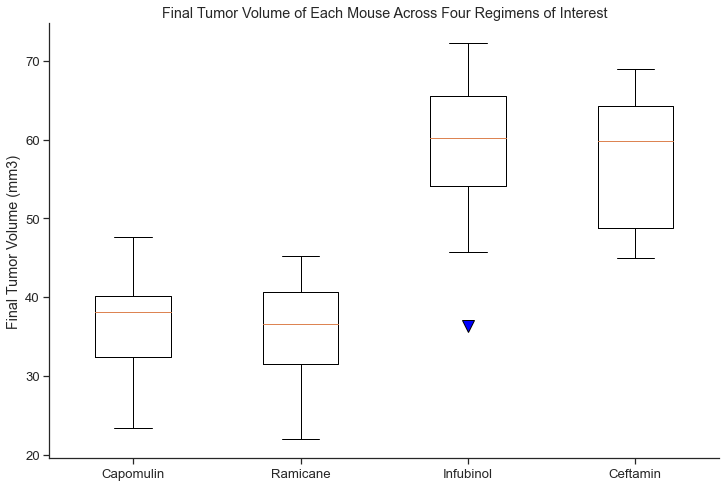

In [27]:
#changing marker, color, and size for outlier
flierprops = dict(marker='v', markerfacecolor='blue', markersize=12)

#plotting final tumor volume info for the four listed drug regimens on the same figure
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, flierprops=flierprops, labels=drug_regimen_list)
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for one mouse treated with Capomulin

In [29]:
#creating df with only capomulin info
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
10,s185,Capomulin,Female,3,17,0,45.000000,0,both
11,s185,Capomulin,Female,3,17,5,43.878496,0,both
12,s185,Capomulin,Female,3,17,10,37.614948,0,both
13,s185,Capomulin,Female,3,17,15,38.177232,0,both
14,s185,Capomulin,Female,3,17,20,36.866876,0,both
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,both
1452,r157,Capomulin,Male,22,25,0,45.000000,0,both
1453,r157,Capomulin,Male,22,25,5,45.597064,0,both
1454,r157,Capomulin,Male,22,25,10,46.059608,0,both


In [30]:
#picking mouse with ID s185 for the line plot
sample_mask = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
sample_mask

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
10,s185,Capomulin,Female,3,17,0,45.000000,0,both
11,s185,Capomulin,Female,3,17,5,43.878496,0,both
12,s185,Capomulin,Female,3,17,10,37.614948,0,both
13,s185,Capomulin,Female,3,17,15,38.177232,0,both
14,s185,Capomulin,Female,3,17,20,36.866876,0,both
15,s185,Capomulin,Female,3,17,25,33.949940,0,both
16,s185,Capomulin,Female,3,17,30,32.959671,1,both
17,s185,Capomulin,Female,3,17,35,28.328531,1,both
18,s185,Capomulin,Female,3,17,40,25.472143,1,both
19,s185,Capomulin,Female,3,17,45,23.343598,1,both


Text(0, 0.5, 'Tumor Volume (mm3)')

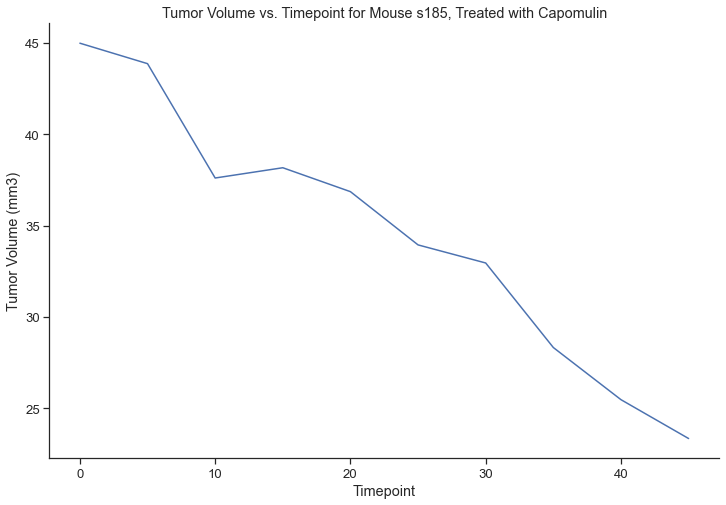

In [31]:
#plotting using filter created above to show only one mouse in the Capomulin regimen
x_timepoint = sample_mask["Timepoint"]
y_tumor_volume = sample_mask["Tumor Volume (mm3)"]
plt.plot(x_timepoint, y_tumor_volume)
plt.title("Tumor Volume vs. Timepoint for Mouse s185, Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [33]:
#calculating avg tumor volume within each weight value
mean_volume_df = capomulin_df.groupby("Weight (g)").agg({"Tumor Volume (mm3)" : "mean"})

#creating df and renaming avg column
mean_volume_df = mean_volume_df.astype("int64").reset_index()
mean_volume_df = mean_volume_df.rename(columns={"Tumor Volume (mm3)":"Avg Tumor Volume (mm3)"})
mean_volume_df

,Weight (g),Avg Tumor Volume (mm3)
0,15,36
1,17,37
2,19,41
3,20,39
4,21,42
5,22,43
6,23,43
7,24,44
8,25,44


Text(0, 0.5, 'Average Tumor Volume')

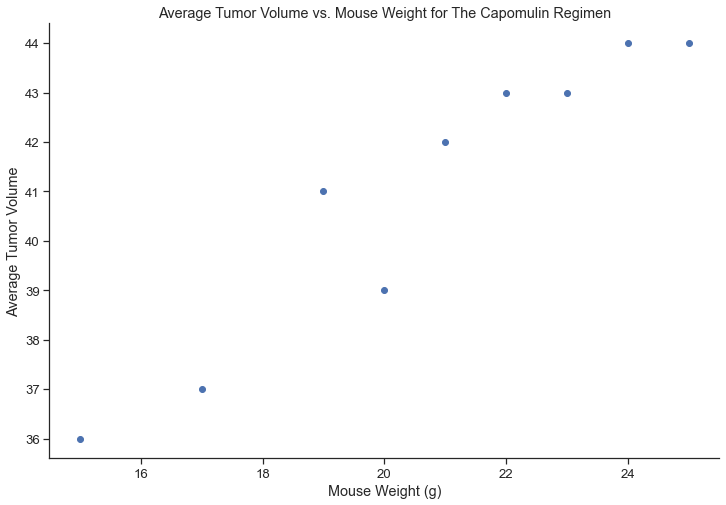

In [34]:
#setting columns to x and y axis variables
x_weight = mean_volume_df["Weight (g)"]
y_avg_volume = mean_volume_df["Avg Tumor Volume (mm3)"]

plt.scatter(x_weight,y_avg_volume)
plt.title("Average Tumor Volume vs. Mouse Weight for The Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [36]:
#calculating correlation using variables created above with columns for weight and avg tumor volume
capomulin_corr = st.pearsonr(x_weight,y_avg_volume)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(capomulin_corr[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.95


The r-squared is: 0.9084302325581398


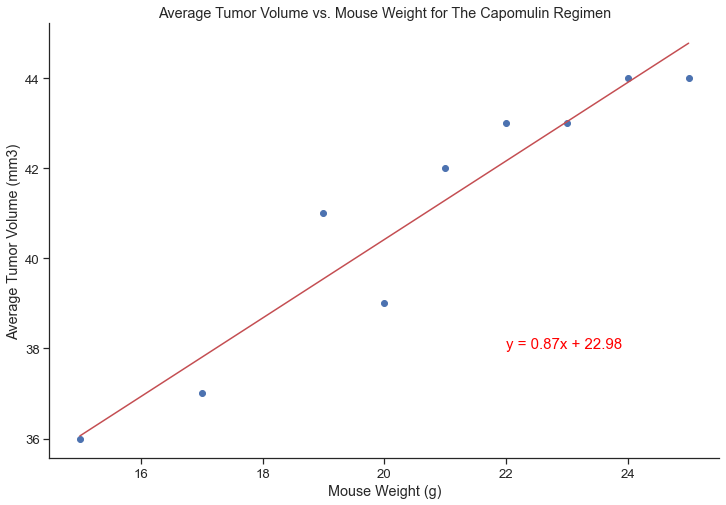

In [37]:
#plotting linear regression model on top of the previous scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_avg_volume)
regress_values = x_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_weight,y_avg_volume)
plt.plot(x_weight,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(22,38),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for The Capomulin Regimen")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()